In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gamma = 0.8095 # г/см ^ 3
p_koef = 0.2
l = 50

In [3]:
d1 = 3.85 # +- 0.05 мм
initial_p_1 = 13 # мм спиртового столба
ps1 = np.array([20   , 25   , 30   , 35.5 ,41   ,50   ,60  , 70  , 81  , 91 , 100 , 120 , 140 , 158 ,])
ts1 = np.array([49.09, 32.84, 21.21, 16.31,13.68,10.06,8.36, 7.13, 5.72,5.15, 5.12, 4.93, 4.16, 4.12,])
vs1 = np.array([0.5  , 0.5  , 0.5  , 0.5  ,0.5  ,0.5  ,0.5 , 0.5 , 0.5 , 0.5, 0.5 , 0.5 , 0.5 , 0.5 ,])

In [4]:
d2 = 5.25 # +- 0.05 мм
initial_p_2 = 13.5
ps2 = np.array([20   , 25   , 30   , 35   ,40  ,48  ,60  , 70  , 80  , 90 , 100 , 120 , 140 ])
ts2 = np.array([37.29, 21.87, 14.41, 11.19,9.09,7.10,7.83, 6.69, 5.84,5.59, 5.03, 4.59, 4.53])
vs2 = np.array([1    , 1    ,  1   ,   1  ,  1 ,  1 ,1   ,   1 , 1   , 1  , 1   , 1   , 1   ])

In [5]:
measures = []
for p, t, v in zip(ps1, ts1, vs1):
    measures.append([d1, (p - initial_p_1) * p_koef, t, v])
for p, t, v in zip(ps2, ts2, vs2):
    measures.append([d2, (p - initial_p_2) * p_koef, t, v])
measures = np.array(measures)

df = pd.DataFrame(data=measures, columns=[r"Диаметр трубки, $мм$",
                                          r"Давление, $мм~спиртового~столба$",
                                          r"Время, $с$",
                                          r"Объем, $дм^3$"])

df

,"Диаметр трубки, $мм$","Давление, $мм~спиртового~столба$","Время, $с$","Объем, $дм^3$"
0,3.85,1.4,49.09,0.5
1,3.85,2.4,32.84,0.5
2,3.85,3.4,21.21,0.5
3,3.85,4.5,16.31,0.5
4,3.85,5.6,13.68,0.5
5,3.85,7.4,10.06,0.5
6,3.85,9.4,8.36,0.5
7,3.85,11.4,7.13,0.5
8,3.85,13.6,5.72,0.5
9,3.85,15.6,5.15,0.5


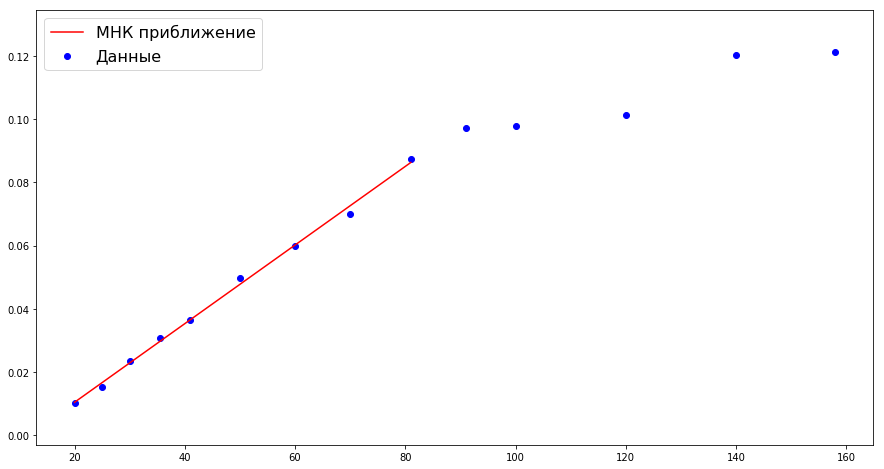

In [11]:
all_x = ps1
all_y = vs1 / ts1

linear_prefix_len = 9
linear_x = all_x[:linear_prefix_len]
linear_y = all_y[:linear_prefix_len]

grid = np.linspace(np.min(linear_x), np.max(linear_x), 500)

plt.figure(figsize=(15, 8))
plt.scatter(all_x, all_y, label="Данные", color='b')

k, b = np.polyfit(linear_x, linear_y, 1)
plt.plot(grid, k * grid + b, label="МНК приближение", color='r')

plt.legend(loc='best', fontsize=16)
plt.show()

In [16]:
# all_x = ps2
# all_y = vs2 / ts2

# linear_prefix_len = 9
# linear_x = all_x[:linear_prefix_len]
# linear_y = all_y[:linear_prefix_len]

# grid = np.linspace(np.min(linear_x), np.max(linear_x), 500)

# plt.figure(figsize=(15, 8))
# plt.scatter(all_x, all_y, label="Данные", color='b')

# k, b = np.polyfit(linear_x, linear_y, 1)
# plt.plot(grid, k * grid + b, label="МНК приближение", color='r')

# plt.legend(loc='best', fontsize=16)
# plt.show()

In [ ]:
delta_p_1 = 4    # мм водяного столба

# 11 -- это в начале трубки, там течение не установившееся
l1s = np.array([40, 30, 11, 50])
p1s = np.array([53, 43, 50, 63])

In [ ]:
delta_p_2 = 12 # мм водяного столба

ls2 = np.array([50  , 40  , 30, 10.6])
ps2 = np.array([56.5, 69.5, 64, 60])